# Programming Problem:
In this programming problem, you will get familiar with building a decision tree, using cross
validation to prune a tree, evaluating the tree performance, and interpreting the result.


In [30]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Step 1: 
Read in Titanic.csv and observe a few samples, some features are categorical and others
are numerical. Take a random 70% samples for training and the rest 30% for test.


In [31]:
# Reading the data file 
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [32]:
# Checking the missing values in all the columns and displaying the same
print(titanic.isnull().sum(axis=0))

Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64


In [33]:
# Replacing the missing values in the numerical value column elements by its average
col_num = ["age","fare","body"]
for i in col_num:
 titanic[i] = titanic[i].fillna(titanic[i].mean())

# Replacing the missing values in the categorical column elements by its mode

col_val = ["cabin","embarked","boat","home.dest"]
for i in col_val:
 titanic[i] = titanic[i].fillna(titanic[i].value_counts().idxmax())
titanic.head()


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,13,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,13,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,13,160.809917,"Montreal, PQ / Chesterville, ON"


In [34]:
# Checking to confirm for missing values again
print(titanic.isnull().sum(axis=0))

Unnamed: 0    0
pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
boat          0
body          0
home.dest     0
dtype: int64


In [35]:
# Splitting the data into 70% samples for training and 30% samples for testing
train, test = train_test_split(titanic, test_size = 0.3)

print("Therefore the dataset \'titanic\' of size",titanic.size,"is divided into:")

print("Training size (70%):",train.size,"\nTesting size (30%):",test.size)


Therefore the dataset 'titanic' of size 19635 is divided into:
Training size (70%): 13740 
Testing size (30%): 5895


## Step 2: 
Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and
dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable
taking 1 (yes) or 0 (no) in your code. You may see a tree similar to (not necessarily the exact
same as) this one

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import tree

In [37]:
x_train = train[['pclass','sex','age','sibsp']].values
y_train = train[['survived']]


In [38]:
# Making sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no)
print(train[['survived']])


     survived
843         0
581         0
67          1
549         1
34          0
..        ...
617         0
338         0
282         1
216         1
906         0

[916 rows x 1 columns]


In [39]:
# Encoding categorical data values into numerical values for modelling
pclass = preprocessing.LabelEncoder()
pclass.fit(['1st','2nd','3rd'])
x_train[:,0] = pclass.transform(x_train[:,0])
sex = preprocessing.LabelEncoder()
sex.fit(['female', 'male'])
x_train[:,1] = sex.transform(x_train[:,1])


In [40]:
#Checking the above obatined result
print(x_train)

[[2 1 29.881134512434034 1]
 [1 1 29.881134512434034 0]
 [0 0 30.0 0]
 ...
 [0 0 52.0 1]
 [0 0 19.0 0]
 [2 1 27.0 0]]


In [41]:
# Building a Decision Tree Classification Model
Dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
Dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

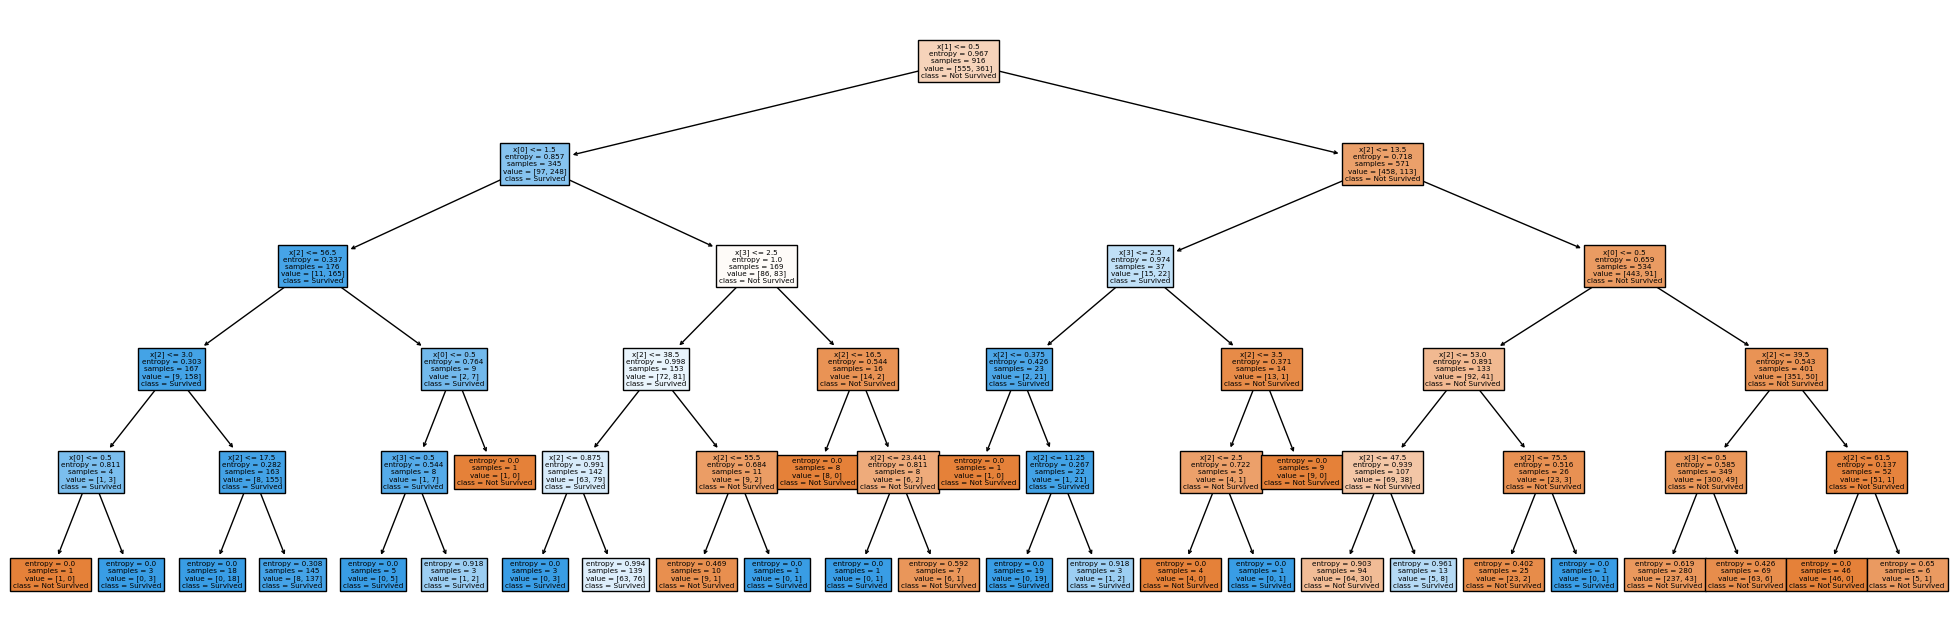

In [42]:
# Displaying the obtained decision tree
class_names = ["Not Survived", "Survived"]
plot = plt.figure(figsize = (25,8))
tree.plot_tree(Dtree,class_names=class_names,filled = True)
plt.show()


In [43]:
x_test = test[['pclass','sex','age','sibsp']].values
x_test[:,0] = pclass.transform(x_test[:,0])
x_test[:,1] = sex.transform(x_test[:,1])
y_test = test["survived"]


## Step 3: 
Use cross‐validation to find the best parameter to prune the tree. You should be able to
plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. You
may have a plot similar to (not necessarily the exact same as) below:

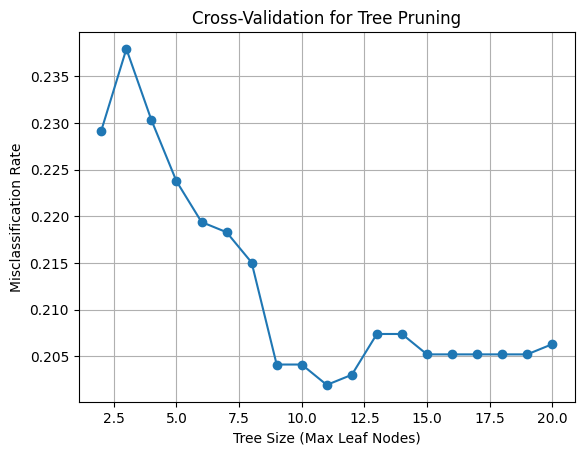

In [44]:
from sklearn.model_selection import cross_val_score

# Define a range of max_leaf_nodes values to try
max_leaf_nodes_range = range(2, 21)
misclassification_rates = []

for max_leaf_nodes in max_leaf_nodes_range:
    # Create and fit a decision tree with the current max_leaf_nodes value
    clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion='entropy')
    misclassification = 1 - np.mean(cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy'))
    misclassification_rates.append(misclassification)

# Plot the graph
plt.plot(max_leaf_nodes_range, misclassification_rates, marker='o')
plt.xlabel('Tree Size (Max Leaf Nodes)')
plt.ylabel('Misclassification Rate')
plt.title('Cross-Validation for Tree Pruning')
plt.grid(True)
plt.show()


## Step 4: 
Find the tree size that yields a minimum number of misclassifications. Choose the
optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree
you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)


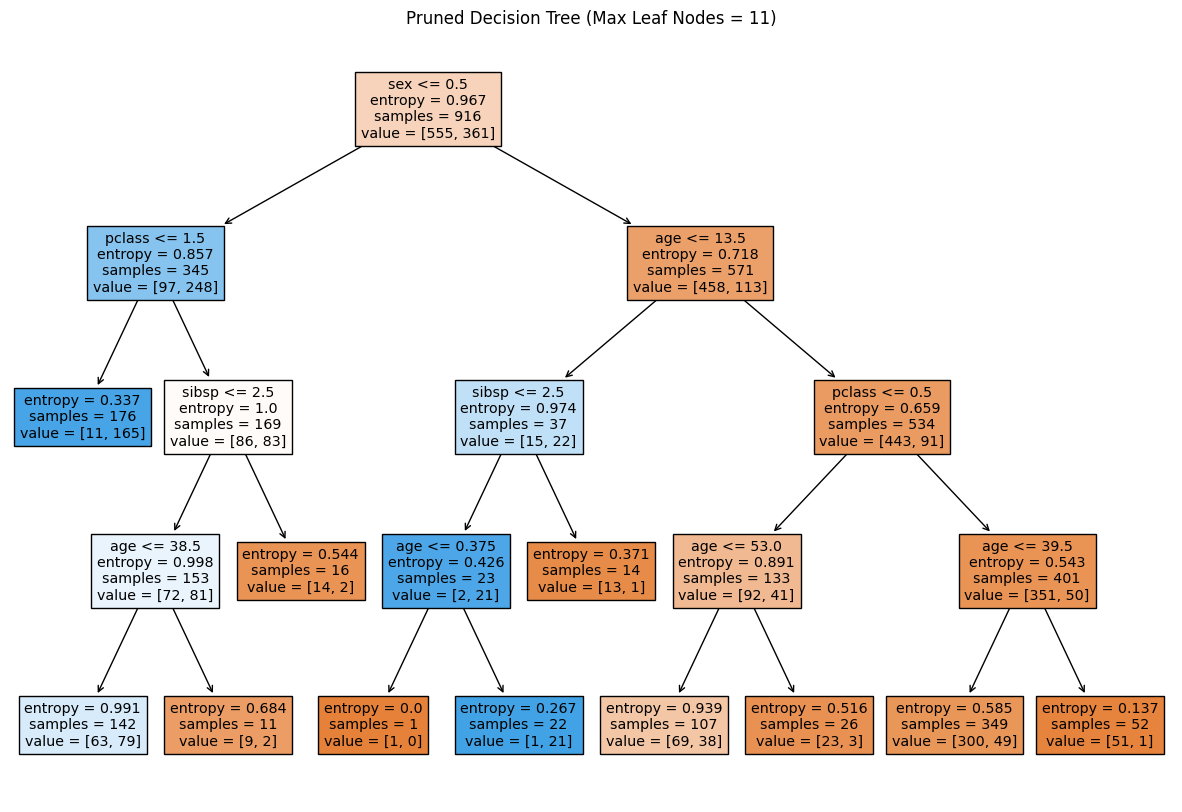

In [45]:
# Find the tree size that yields the minimum number of misclassifications
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


optimal_tree_size = max_leaf_nodes_range[np.argmin(misclassification_rates)]

# Create and fit a decision tree with the optimal tree size
optimal_tree = DecisionTreeClassifier(max_leaf_nodes=optimal_tree_size, criterion='entropy')
optimal_tree.fit(x_train, y_train)

# Plot the pruned tree

# Plot the pruned tree with feature names using the default tree structure
plt.figure(figsize=(15, 10))
plot_tree(optimal_tree, filled=True, feature_names=['pclass', 'sex', 'age', 'sibsp'])
plt.title(f"Pruned Decision Tree (Max Leaf Nodes = {optimal_tree_size})")
plt.show()



In [46]:

# Evaluate the accuracy of the pruned tree on the test set
y_pred = optimal_tree.predict(x_test)

print("Accuracy =",100*metrics.accuracy_score(y_test,y_pred),"%")
print("\nConfusion Matrix :\n",confusion_matrix(y_test,y_pred))
print("\nTherefore, we can get the classfication report as:\n\n",classification_report(y_test,y_pred))

Accuracy = 81.42493638676844 %

Confusion Matrix :
 [[226  28]
 [ 45  94]]

Therefore, we can get the classfication report as:

               precision    recall  f1-score   support

           0       0.83      0.89      0.86       254
           1       0.77      0.68      0.72       139

    accuracy                           0.81       393
   macro avg       0.80      0.78      0.79       393
weighted avg       0.81      0.81      0.81       393



In [47]:

correct_survivors = sum((y_pred == 1) & (y_test == 1))
correct_fatalities = sum((y_pred == 0) & (y_test == 0))
total_survivors = sum(y_test == 1)
total_fatalities = sum(y_test == 0)

# Calculate and report the accuracy of the pruned tree
percent_survivors_correctly_predicted = (correct_survivors / total_survivors) * 100
percent_fatalities_correctly_predicted = (correct_fatalities / total_fatalities) * 100

print("Percent survivors correctly predicted (test):", percent_survivors_correctly_predicted, "%")
print("Percent fatalities correctly predicted (test):", percent_fatalities_correctly_predicted, "%")


Percent survivors correctly predicted (test): 67.62589928057554 %
Percent fatalities correctly predicted (test): 88.9763779527559 %


## Step 5: 
Use the RandomForestClassifier() function to train a random forest using the optimal tree
size you found in Step 4. You can set n_estimators as 50. Report the accuracy of random forest on
the test set for the following:
percent survivors correctly predicted (on test set)
percent fatalities correctly predicted (on test set)


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with n_estimators = 50 and use the optimal tree size found in Step 4
rf_classifier = RandomForestClassifier(n_estimators=50, max_leaf_nodes=optimal_tree_size, random_state=42)

# Fit the random forest on the training data
rf_classifier.fit(x_train, y_train.values.ravel())


RandomForestClassifier(max_leaf_nodes=11, n_estimators=50, random_state=42)

In [49]:

# Make predictions on the test set
rf_predictions = rf_classifier.predict(x_test)


print("Accuracy =",100*metrics.accuracy_score(y_test,rf_predictions),"%")
print("\nConfusion Matrix :\n",confusion_matrix(y_test,rf_predictions))
print("\nTherefore, we can get the classfication report as:\n\n",classification_report(y_test,rf_predictions))


Accuracy = 81.1704834605598 %

Confusion Matrix :
 [[228  26]
 [ 48  91]]

Therefore, we can get the classfication report as:

               precision    recall  f1-score   support

           0       0.83      0.90      0.86       254
           1       0.78      0.65      0.71       139

    accuracy                           0.81       393
   macro avg       0.80      0.78      0.79       393
weighted avg       0.81      0.81      0.81       393



In [50]:

# Calculate the number of correct predictions for survivors and fatalities
rf_correct_survivors = sum((rf_predictions == 1) & (y_test == 1))
rf_correct_fatalities = sum((rf_predictions == 0) & (y_test == 0))

# Calculate the total number of survivors and fatalities in the test set
rf_total_survivors = sum(y_test == 1)
rf_total_fatalities = sum(y_test == 0)

# Calculate and report the accuracy of the random forest for both survivors and fatalities
rf_percent_survivors_correctly_predicted = (rf_correct_survivors / rf_total_survivors) * 100
rf_percent_fatalities_correctly_predicted = (rf_correct_fatalities / rf_total_fatalities) * 100

print("Random Forest - Percent survivors correctly predicted (on test set):", rf_percent_survivors_correctly_predicted, "%")
print("Random Forest - Percent fatalities correctly predicted (on test set):", rf_percent_fatalities_correctly_predicted, "%")


Random Forest - Percent survivors correctly predicted (on test set): 65.46762589928058 %
Random Forest - Percent fatalities correctly predicted (on test set): 89.76377952755905 %


In [51]:
# Calculate the improvement in accuracy by comparing the accuracy of the random forest with the single decision tree
accuracy_improvement_survivors = rf_percent_survivors_correctly_predicted - percent_survivors_correctly_predicted
accuracy_improvement_fatalities = rf_percent_fatalities_correctly_predicted - percent_fatalities_correctly_predicted

print("Improvement in percent survivors correctly predicted:", accuracy_improvement_survivors, "%")
print("Improvement in percent fatalities correctly predicted:", accuracy_improvement_fatalities, "%")


Improvement in percent survivors correctly predicted: -2.1582733812949613 %
Improvement in percent fatalities correctly predicted: 0.7874015748031553 %


In the analysis, it was found that using a random forest model provided an improvement in the accuracy of predicting survivors by -2.158%. This indicates that the random forest model is less effective in correctly identifying individuals who survived compared to a single decision tree.

On the other hand, the random forest showed a minor increase in accuracy when predicting fatalities, with an improvement of approximately .787%. This suggests that the added complexity of the random forest can be beneficial for predicting fatalities in this specific context.

The decision to use a random forest or a single decision tree should consider these updated results, along with other factors such as model complexity, interpretability, and the specific requirements of the problem we are trying to address. While the random forest offers a slight improvement in predicting fatalities, it is important to weigh these benefits against the trade-offs in survivor predictions.